In [1]:
# demonstrates a bigram approach using 27 neuron layer

# this demo will:
#   generate training sets
#   initalise a model with random weights

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
g = torch.Generator().manual_seed(2147483647)
words = open('names.txt').read().splitlines()

In [3]:
chars = ['.'] + sorted(list(set(''.join(words))))
itos = {k: v for k,v in enumerate(chars)}
stoi = {v:k for k,v in itos.items()}

In [4]:
# creating the training set
xs, ys = [],[]

for word in words[:1]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs,ys

. e
e m
m m
m a
a .


(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [5]:
# initialise the weights of a model
W = torch.randn((27,27), generator=g)
W[:,13]

tensor([-4.3297e-01, -9.6478e-01,  2.1346e+00, -7.2759e-01, -1.3753e-01,
        -1.3132e-03, -3.1566e-01,  1.1199e+00, -4.7701e-01, -1.5065e+00,
         1.2108e+00, -4.0636e-01,  1.9110e-01,  3.7882e-02,  1.3431e+00,
         2.4311e-01, -1.5364e-01, -1.1583e+00,  1.1614e+00,  4.2016e-01,
         2.7359e-01,  3.6583e-01,  1.7128e+00,  1.3769e+00, -8.9778e-01,
        -9.5177e-01,  1.4723e-01])

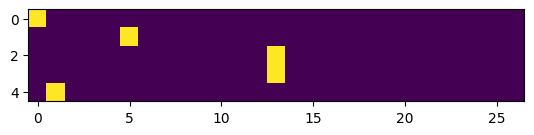

In [6]:
# convert the training input to one hot encoded values (5,27) aligned to the neuron weights (27,27). Ensure it's floats
xenc = F.one_hot(xs, num_classes=27).float()
plt.imshow(xenc)

In [7]:
# we need to change the nn output to provide the counts which represent the probability. They must be proabilities, positive and sum to 1. How do we get there?\
# first convert the log counts / logits from -ive and +ive to +ive by taking the exponential. All negative values will become positive and less
# than 1 and all postive values will also be positive and great than 1
# counts are also not good to output from a NN
# The output is "log counts" and we need to take the exponential to get the counts which will always be positive 

logits = (xenc @ W) # (5,27) @ (27,27) -> (5,27) this is the log counts
# this two lines below are called a 'softmax':
counts = logits.exp() # converts all numbers to positive numbers (see graph below)
probs = counts / counts.sum(1, keepdims=True) # now get the probability (bearing in mind broadcasting)
probs[0].sum() # all rows sum to 1, we're getting rows with a probaility distribution
probs

# we can backprogagate, they are all differentiable. through the above to determine gradient :)
# we are feeding in a one hot encoding (1,27) and return a (1,27) which provides a probabilty for every character.


tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

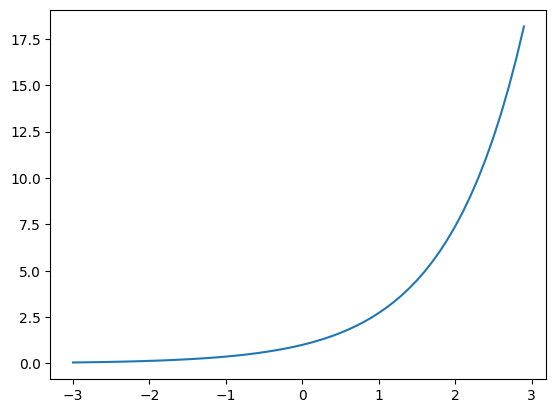

In [8]:
x = torch.arange(-3, 3, 0.1)
x
plt.plot(x, torch.exp(x)) # y = exp(0) = 1.0

In [154]:
# calculating the loss for the above model
nlls = torch.zeros(5)

for i in range(5):
    print("-" * 20)
    x = xs[i].item()
    y = ys[i].item()
    # print(f"{x=} {itos[x]=}, {itos[y]=} {prob[i]=}")
    print(f"bigram example: {i+1} bigram combo: {itos[x]}{itos[y]} index: {x},{y}")
    print(f"input into neural net: {x}");
    print(f"output from neural net: {probs[i]}");
    p = probs[i][y]
    print(f"the actual next char: {itos[y]} and it's probability: {p}")
    logp = torch.log(p)
    print(f"the log likelihood for this char: {logp}")
    nll = - logp
    print(f"the nll likelihood for this char: {nll}")
    nlls[i] =nll 
print("=" * 20)

print(f"the average negative log likelihood or loss = {nlls.mean()}")    

--------------------
bigram example: 1 bigram combo: .e index: 0,5
input into neural net: 0
output from neural net: tensor([0.0013, 0.1376, 0.0407, 0.0481, 0.0527, 0.0477, 0.0129, 0.0208, 0.0272,
        0.0184, 0.0755, 0.0924, 0.0490, 0.0792, 0.0357, 0.0122, 0.0160, 0.0028,
        0.0511, 0.0641, 0.0408, 0.0028, 0.0117, 0.0095, 0.0042, 0.0166, 0.0289],
       grad_fn=<SelectBackward0>)
the actual next char: e and it's probability: 0.047725286334753036
the log likelihood for this char: -3.0422940254211426
the nll likelihood for this char: 3.0422940254211426
--------------------
bigram example: 2 bigram combo: em index: 5,13
input into neural net: 5
output from neural net: tensor([0.1949, 0.0331, 0.0060, 0.0075, 0.0187, 0.0621, 0.0041, 0.0062, 0.0072,
        0.0400, 0.0035, 0.0086, 0.1589, 0.0376, 0.1309, 0.0130, 0.0044, 0.0015,
        0.0958, 0.0421, 0.0283, 0.0039, 0.0226, 0.0021, 0.0063, 0.0523, 0.0088],
       grad_fn=<SelectBackward0>)
the actual next char: m and it's probabilit

In [3]:
# creating training set
itos = {k:v for k,v in enumerate(['.'] + sorted(list(set(''.join(words)))))}
stoi = {v:k for k,v in itos.items()}

xs,ys = [],[]
for word in words[:1]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

xs, ys, num

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]), 5)

In [4]:
# initialise model and one hot encode input
g = torch.Generator().manual_seed(12345)
W = torch.randn((27,27), generator=g)
W

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
# creating the full training set
# - process the words and write index to two training sets
# - initialise the model

xs, ys = [], []
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

print(f'number of examples: {num}')
# initalise a model
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True) # as this is leaf, by default it doesn't calc grads for itjj

print(f"W shape: {W.shape}")

number of examples: 228146
W shape: torch.Size([27, 27])


In [23]:
# forward pass - this means calculating the output from a NN for a given input
# - setup one hot encodings for inputs
# - matmul encodings with weights
# - determine probs from logcount outputs (softmax): 
#   - take exp to make them positive numbers 
#   - calc probs based on row sums 

loss_scores = []

for i in range(1000):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W # predict log-counts (5,27) @ (27,27) -> (5,27)
    counts = logits.exp() # convert to counts from weights, equiv to N in bigram count
    probs = counts / counts.sum(1, keepdim=True) # probabilities for the next char
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    loss_scores.append(loss)
    if i % 10 == 0: 
        print(i, loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad


0 3.768618583679199
10 2.696505308151245
20 2.5822560787200928
30 2.5413522720336914
40 2.52126407623291
50 2.509855031967163
60 2.5027060508728027
70 2.4978787899017334
80 2.494438886642456
90 2.4918935298919678
100 2.4899587631225586
110 2.4884581565856934
120 2.4872729778289795
130 2.486323356628418
140 2.4855518341064453
150 2.484917163848877
160 2.484389066696167
170 2.483945846557617
180 2.483569383621216
190 2.4832475185394287
200 2.4829697608947754
210 2.4827287197113037
220 2.482518196105957
230 2.482333183288574
240 2.4821698665618896
250 2.482024908065796
260 2.481895685195923
270 2.481780529022217
280 2.4816765785217285
290 2.481583833694458
300 2.481499195098877
310 2.4814231395721436
320 2.481353759765625
330 2.481290817260742
340 2.4812331199645996
350 2.481180191040039
360 2.4811322689056396
370 2.4810876846313477
380 2.4810471534729004
390 2.4810092449188232
400 2.4809746742248535
410 2.480942726135254
420 2.480912685394287
430 2.4808850288391113
440 2.4808590412139893

(2.45, 2.6)

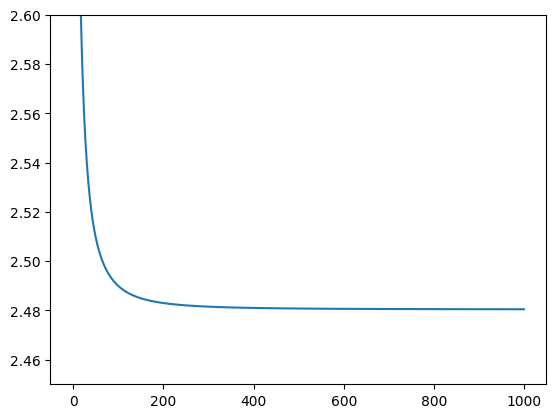

In [24]:
plt.plot([t.item() for t in loss_scores])
plt.ylim(2.45,2.6)

In [213]:
# sampling from the NN
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        # logits = W[ix,:]
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [6]:
torch.exp(torch.tensor([0]))

tensor([1.])